In [ ]:
import pandas as pd

##### je lis les fichiers csv en spécifiant la colonne "date" comme étant au format approprié.

In [2]:
df_flights=pd.read_csv('flights.csv', parse_dates=['date'])

In [3]:
df_flights['date'] = pd.to_datetime(df_flights['date'], format='%d-%m-%Y')

In [4]:
df_weather=pd.read_csv('weather.csv', parse_dates=['date'])

In [5]:
df_weather['date'] = pd.to_datetime(df_weather['date'], format='%d-%m-%Y')

##### je vais  procéder à quelques checks de mes données

In [6]:
# je vais vérifier le type de données de chaque colonne

In [7]:
df2=df_flights.dtypes

In [8]:
df3=df_weather.dtypes

In [9]:
df2

id                            int64
date                 datetime64[ns]
number_passengers           float64
duration                    float64
dtype: object

In [10]:
df3

date             datetime64[ns]
temperature             float64
windSpeed               float64
precipitation           float64
dtype: object

In [11]:
# je vais checker certaines statistiques sommaires

In [12]:
df33=df_weather.describe()

In [13]:
df33

,temperature,windSpeed,precipitation
count,7671.000000,7671.000000,7671.000000
mean,19.532910,3.803526,7.919991
std,53.265829,12.423169,21.750922
min,-79.347496,0.000000,0.000000
25%,3.253893,0.594275,1.657929
50%,10.485883,1.475993,3.631278
75%,17.462711,2.941620,6.478508
max,489.308140,237.145660,288.436430


In [14]:
df22=df_flights.describe()

In [15]:
df22

,id,number_passengers,duration
count,112104.000000,56216.000000,112104.000000
mean,56051.500000,116.755781,2.861329
std,32361.781626,277.825526,6.817787
min,0.000000,-1860.000000,-45.565952
25%,28025.750000,41.000000,1.045085
50%,56051.500000,70.000000,1.158159
75%,84077.250000,84.000000,2.058844
max,112103.000000,1960.000000,47.343254


## comme j'ai quelques valeurs aberrantes du type passagers négatifs et durée négative, vitesse de 0 mètres par secondes, 489°C, je vais devoir procéder à quelques retraitements

In [16]:
""" De surcroît, la table 1 me confirme qu'aucun n'avion ne peut faire 47 heures de vol ou excéder 150 personnes; 
ce qui m'aiguille déjà pour éviter par exemple déjà de croire que -1860 aurait dû être 1860 ou -45h serait 45 heures en fait """

" De surcroît, la table 1 me confirme qu'aucun n'avion ne peut faire 47 heures de vol ou excéder 150 personnes; \nce qui m'aiguille déjà pour éviter par exemple déjà de croire que -1860 aurait dû être 1860 ou -45h serait 45 heures en fait "

In [17]:
# je vais regarder les valeurs manquantes par colonne

In [18]:
df222=df_flights.isna().sum()
df222

id                       0
date                     0
number_passengers    55888
duration                 0
dtype: int64

In [19]:
df333=df_weather.isna().sum()
df333

date             0
temperature      0
windSpeed        0
precipitation    0
dtype: int64

In [20]:
# je vais quand même procéder à un checkup plus concis (qui résume un peu tout ça de façon brève)

In [21]:
df2222=df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112104 entries, 0 to 112103
Data columns (total 4 columns):
id                   112104 non-null int64
date                 112104 non-null datetime64[ns]
number_passengers    56216 non-null float64
duration             112104 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.4 MB


In [22]:
df3333=df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7671 entries, 0 to 7670
Data columns (total 4 columns):
date             7671 non-null datetime64[ns]
temperature      7671 non-null float64
windSpeed        7671 non-null float64
precipitation    7671 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 239.8 KB


In [23]:
# je vais quand même compter les valeurs par colonnes: commençons par le dataframe weather

In [24]:
df_3a= df_weather['temperature'].value_counts()
df_3a.sort_values(ascending=True)

 20.874828      1
-1.208921       1
 1.919446       1
-1.896596       1
 19.330065      1
 7.142929       1
 4.727733       1
 6.652880       1
 288.404700     1
 9.001639       1
 0.093292       1
 13.749108      1
 6.693993       1
 0.257721       1
 6.763604       1
 5.671044       1
 3.371255       1
 20.745850      1
 11.471158      1
 17.585440      1
 6.095921       1
 8.020747       1
 13.050578      1
 3.250056       1
 17.354168      1
 4.087983       1
 14.958872      1
 14.978124      1
 3.528756       1
 18.043924      1
               ..
 8.683847       1
 384.956000     1
 16.518520      1
 6.890274       1
 17.452131      1
-0.276052       1
 6.374726       1
 19.880865      1
-0.281355       1
 12.676618      1
 13.430066      1
 10.170034      1
 21.644423      1
 11.604886      1
 20.560223      1
 18.647860      1
 5.073588       1
 21.132520      1
 6.880280       1
 4.947265       1
 4.209737       1
 18.910751      1
 22.084694      1
 3.114981       1
 57.701637

In [25]:
""" les données semblent uniques sauf pour le 0 degré; 
ducoup je pense que je vais choisir de le traiter également d'une certaine manière"""

" les données semblent uniques sauf pour le 0 degré; \nducoup je pense que je vais choisir de le traiter également d'une certaine manière"

In [26]:
df_3b= df_weather['windSpeed'].value_counts()
df_3b.sort_values(ascending=True)

1.548735      1
1.698509      1
2.486569      1
3.715395      1
3.832725      1
0.502238      1
0.712894      1
3.655603      1
1.063114      1
3.636783      1
3.214878      1
1.697994      1
3.251176      1
1.567979      1
0.832066      1
1.685779      1
0.217899      1
3.699761      1
3.458778      1
0.213204      1
2.773620      1
0.969977      1
1.716909      1
20.527536     1
3.400359      1
1.053448      1
1.943832      1
40.727135     1
0.403100      1
1.350517      1
             ..
0.125835      4
4.179244      4
5.349456      4
4.180413      4
0.353592      4
3.766423      4
1.474871      4
1.950146      4
5.616172      4
0.181018      4
5.933981      4
0.322824      4
5.822862      4
3.056232      4
0.428463      4
0.238912      4
3.877764      4
0.374154      4
2.282822      4
0.535481      4
1.591989      4
1.615462      4
2.655201      4
0.673721      4
1.612149      4
1.226821      4
1.176948      4
2.043396      4
2.349890      4
0.000000     71
Name: windSpeed, Length:

In [27]:
""" la vitesse du vent de 0 comme elle présente une similitude avec la température 0 (71 observations)
cela confirme mon intuition précédente de ce que probablement je vais devoir retraiter ces valeurs."""

' la vitesse du vent de 0 comme elle présente une similitude avec la température 0 (71 observations)\ncela confirme mon intuition précédente de ce que probablement je vais devoir retraiter ces valeurs.'

In [28]:
df_3c= df_weather['precipitation'].value_counts()
df_3c.sort_values(ascending=True)

7.030349       1
11.248911      1
3.467696       1
0.800083       1
10.737974      1
0.494154       1
1.186865       1
2.208149       1
6.785851       1
4.563447       1
7.483463       1
3.881434       1
2.456304       1
136.339000     1
5.415416       1
2.198817       1
51.716366      1
1.475182       1
1.051240       1
0.870076       1
5.759359       1
7.017681       1
1.380833       1
4.453856       1
0.559749       1
5.057501       1
4.150252       1
9.436015       1
3.225278       1
1.128516       1
              ..
4.776514       4
1.860007       4
5.714308       4
5.513103       4
2.099379       4
2.243029       4
3.883308       4
3.451219       4
0.222121       4
10.163235      4
1.470482       4
0.675159       4
1.616170       4
1.839899       4
6.556308       4
1.849664       4
2.772595       4
7.535642       4
2.464920       4
1.137504       4
1.989960       4
3.635857       4
2.810476       4
0.283101       4
2.636796       4
2.836392       4
6.652619       4
2.571912      

In [29]:
""" les données de précipitations corroborent aussi les précédentes remarques; 
c'est décidé, on doit les retraiter car ces données sont vraisemblablement non justes"""

" les données de précipitations corroborent aussi les précédentes remarques; \nc'est décidé, on doit les retraiter car ces données sont vraisemblablement non justes"

In [30]:
df_3d= df_weather['date'].value_counts()
df_3d.sort_values(ascending=True)

2007-09-10    1
1998-05-23    1
2011-07-31    1
2000-11-03    1
2006-05-26    1
1999-10-27    1
2013-10-26    1
2011-07-15    1
2010-05-24    1
2005-10-29    1
2001-04-05    1
2011-12-20    1
1998-12-23    1
2010-09-25    1
2008-02-04    1
2000-07-31    1
1996-03-11    1
2015-04-20    1
2003-07-12    1
2012-04-15    1
2012-02-09    1
1997-05-02    1
2010-01-02    1
2013-07-09    1
1996-09-04    1
1996-09-10    1
2008-12-14    1
2009-12-22    1
2015-05-24    1
2009-09-07    1
             ..
2003-02-26    1
1998-10-27    1
2001-12-20    1
2013-02-10    1
2012-02-27    1
2005-02-10    1
2000-02-12    1
2002-10-30    1
1995-07-20    1
2015-03-28    1
2012-12-14    1
2009-07-12    1
1995-05-25    1
2008-05-21    1
2004-07-12    1
1999-04-03    1
2001-08-27    1
2015-03-06    1
2012-04-29    1
2013-05-21    1
2009-12-17    1
2006-07-15    1
2003-02-10    1
1999-09-08    1
1997-05-27    1
1995-02-13    1
2004-12-17    1
2013-02-23    1
1996-12-20    1
2006-03-22    1
Name: date, Length: 7671

In [31]:
""" comme espéré on a les données méteo de la ville mesurés 7671 durant """

' comme espéré on a les données méteo de la ville mesurés 7671 durant '

In [32]:
# interessons nous au dataframe weather maintenant et regardons aussi les valeurs par colonnes

In [33]:
df_2a= df_flights['number_passengers'].value_counts()
df_2a.sort_values(ascending=True)

-920.0        1
-1380.0       1
 1120.0       1
-820.0        1
-640.0        1
-98.0         1
-27.0         1
-980.0        1
-1860.0       1
 1160.0       1
-880.0        1
 20.0         1
-99.0         1
-26.0         1
-940.0        1
-1420.0       1
-1700.0       1
-56.0         1
-1460.0       1
-1680.0       1
-65.0         1
-60.0         1
-1300.0       1
 560.0        2
 1220.0       2
-1720.0       2
-780.0        2
-1520.0       2
-1800.0       2
 23.0         2
           ... 
 35.0       927
 75.0       970
 91.0      1002
 89.0      1006
 90.0      1050
 47.0      1071
 88.0      1082
 76.0      1101
 87.0      1109
 85.0      1131
 84.0      1142
 83.0      1145
 80.0      1155
 77.0      1157
 82.0      1165
 86.0      1167
 78.0      1168
 79.0      1173
 81.0      1177
 36.0      1203
 37.0      1448
 46.0      1502
 38.0      1636
 45.0      1665
 39.0      1787
 40.0      1933
 44.0      1951
 43.0      1954
 41.0      2012
 42.0      2035
Name: number_passengers,

In [34]:
""" on confirme qu'on a des passagers négatifs et supérieurs à 150 qu'il faudra retraiter 
(puisque d'après la table 1, aucun avion ne prend plus de 150 passagers et ainsi il est exclu 
de penser que les valeurs négatives du type -1860 peuvent être des erreurs et doivent être positives du type 1860)"""

" on confirme qu'on a des passagers négatifs et supérieurs à 150 qu'il faudra retraiter \n(puisque d'après la table 1, aucun avion ne prend plus de 150 passagers et ainsi il est exclu \nde penser que les valeurs négatives du type -1860 peuvent être des erreurs et doivent être positives du type 1860)"

In [35]:
""" je confirme que j'ai des données à retraiter lorsque je vois par exemple des durées de 20 heures """

" je confirme que j'ai des données à retraiter lorsque je vois par exemple des durées de 20 heures "

In [36]:
df_2b= df_flights['duration'].value_counts()
df_2b.sort_values(ascending=True)

2.062066     1
2.049161     1
2.023057     1
1.038494     1
1.079932     1
1.018544     1
1.039631     1
2.109692     1
1.945282     1
20.659885    1
2.176265     1
2.134683     1
2.018341     1
2.050879     1
1.992489     1
2.012243     1
1.036677     1
2.054210     1
2.051503     1
2.055779     1
2.113368     1
0.994947     1
1.073203     1
1.178643     1
1.049726     1
1.151848     1
1.966961     1
0.952866     1
2.016879     1
0.997393     1
            ..
2.091069     3
1.041586     3
1.071526     3
1.006695     3
2.032247     3
1.016160     3
2.064500     3
1.016798     3
2.096943     3
1.011349     3
2.136363     3
1.051613     3
1.046915     3
1.074316     3
1.067882     3
2.129487     3
1.063693     3
2.003525     3
2.105402     3
2.082447     3
2.018778     3
2.081352     3
2.116997     3
1.061547     3
1.002662     3
1.027331     3
2.016652     3
1.002853     3
2.049998     3
1.099367     3
Name: duration, Length: 110021, dtype: int64

In [37]:
df_2c= df_flights['date'].value_counts()
df_2c.sort_values(ascending=True)

1995-02-13     6
1996-02-12     6
1996-12-26     6
1997-05-01     6
1995-08-06     6
1996-12-01     6
1996-07-28     6
1996-07-17     6
1996-07-23     6
1997-02-17     6
1995-12-21     6
1996-10-31     6
1995-06-09     6
1995-05-20     6
1996-01-10     6
1996-08-12     6
1997-01-28     6
1997-06-03     6
1997-02-28     6
1995-11-25     6
1996-03-30     6
1995-07-05     6
1996-11-30     6
1995-04-24     6
1996-06-16     6
1995-03-22     6
1996-06-06     6
1996-09-14     6
1995-12-10     6
1997-01-21     6
              ..
2014-10-30    24
2014-12-27    24
2015-01-07    24
2015-04-19    24
2015-06-18    24
2015-07-30    24
2015-06-30    24
2015-01-03    24
2014-11-14    24
2015-08-06    24
2015-03-01    24
2014-09-18    24
2015-10-11    24
2015-01-18    24
2015-06-27    24
2015-10-04    24
2015-07-25    24
2015-12-15    24
2014-09-25    24
2015-01-04    24
2014-10-28    24
2015-06-17    24
2015-05-26    24
2015-12-18    24
2015-07-08    24
2015-05-14    24
2015-01-29    24
2015-05-31    

In [38]:
""" j'ai juste checkher les dates et à priori, il y a entre 6 et 24 vols par jour"""

" j'ai juste checkher les dates et à priori, il y a entre 6 et 24 vols par jour"

### Examinons un peu plus nos données, notamment les outliers

In [39]:
# commencons avec le dataset weather

In [40]:
import matplotlib.pyplot as plt
df_weather[['temperature']].boxplot()
plt.show()

<Figure size 640x480 with 1 Axes>

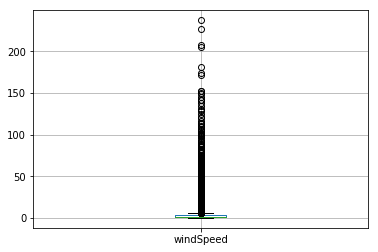

In [41]:
import matplotlib.pyplot as plt
df_weather[['windSpeed']].boxplot()
plt.show()

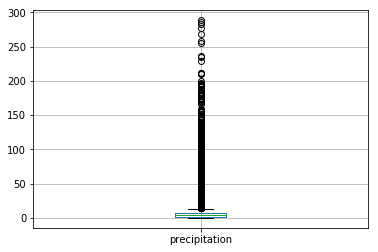

In [42]:
import matplotlib.pyplot as plt
df_weather[['precipitation']].boxplot()
plt.show()

In [43]:
# poursuivons avec le dataset flight

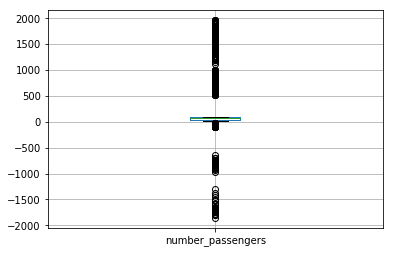

In [44]:
import matplotlib.pyplot as plt
df_flights[['number_passengers']].boxplot()
plt.show()

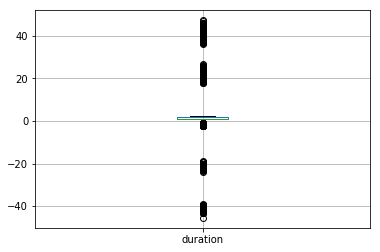

In [45]:
import matplotlib.pyplot as plt
df_flights[['duration']].boxplot()
plt.show()

In [46]:
# clairement avec les boites en moustaches on perçoit bien les valeurs qui seront outliers

In [47]:
# procédons cette fois ci par de tout petits calculs

In [48]:
"""comme on sait que toute boite à moustache s'étend sur 1,5 intervalle interquartile, 
on admet que tout point à partir de 2 IIQ est 1 outlier """

"comme on sait que toute boite à moustache s'étend sur 1,5 intervalle interquartile, \non admet que tout point à partir de 2 IIQ est 1 outlier "

In [49]:
# calculons l'IIQ(intervalle interquartile) commençons par ceux du dataset flights

In [50]:
import numpy as np
iiq_duration = np.percentile(df_flights[['duration']], 75) - np.percentile(df_flights[['duration']], 25)
iiq_duration

1.013758525

In [51]:
import numpy as np
iiq_passenger = np.percentile(df_flights[['number_passengers']], 75) - np.percentile(df_flights[['number_passengers']], 25)
iiq_passenger

nan

In [52]:
# calculons l'IIQ(intervalle interquartile) poursuivons avec ceux du dataset weather

In [53]:
import numpy as np
iiq_windSpeed = np.percentile(df_weather[['windSpeed']], 75) - np.percentile(df_weather[['windSpeed']], 25)
iiq_windSpeed

2.3473450399999995

In [54]:
import numpy as np
iiq_precipitation = np.percentile(df_weather[['precipitation']], 75) - np.percentile(df_weather[['precipitation']], 25)
iiq_precipitation

4.82057835

In [55]:
import numpy as np
iiq_temperature = np.percentile(df_weather[['temperature']], 75) - np.percentile(df_weather[['temperature']], 25)
iiq_temperature

14.20881775

##  voici ce que j'ai admis  pour temperature

In [56]:
# 1) la temperature minimale observée peut être valide car le record du monde est plus bas que celle-ci. 
# la destination est peut être le Groenland ou Canada ou Russie

# 2) je crois fermement que 71 observations (0) ont été comptabilisées de manière érronées;
# je m'appuie sur le fait que la valeur 0 apparait 71 fois dans 3 colonnes du fichier weather

In [57]:
# enlevons les outliers de weather
df_weather_without_outliers_filter_1 = df_weather.loc[(df_weather['temperature'] < 2*iiq_temperature) & 
                               (df_weather['temperature'] != 0.000000)]
df_weather_without_outliers_filter_1

,date,temperature,windSpeed,precipitation
0,1995-01-01,0.185703,3.152788,4.090158
1,1995-02-01,2.093932,0.982883,1.429355
2,1995-03-01,0.242077,2.429390,4.202771
3,1995-04-01,1.734953,0.606430,11.869286
4,1995-05-01,-3.544882,0.255810,4.960454
5,1995-06-01,-0.347100,2.434251,8.062354
6,1995-07-01,-1.368522,1.021887,2.278027
7,1995-08-01,-0.220048,2.744087,9.386690
8,1995-09-01,-1.723697,3.596205,10.195053
9,1995-10-01,0.702839,3.338220,1.179913


In [58]:
""" avec ce premier filtre je passe de 7671 à 7271 observations"""

' avec ce premier filtre je passe de 7671 à 7271 observations'

## voici ce que  j'ai admis pour Windspeed

In [59]:
# 1) 71 observations ont été reportées de manières erronnées(même raisonnement que précédemment)
 

In [60]:
df_weather_without_outliers_filter_2 = df_weather_without_outliers_filter_1[(df_weather_without_outliers_filter_1['windSpeed'] < 2*iiq_windSpeed) & 
                               (df_weather_without_outliers_filter_1['windSpeed'] != 0.000000)]
df_weather_without_outliers_filter_2

,date,temperature,windSpeed,precipitation
0,1995-01-01,0.185703,3.152788,4.090158
1,1995-02-01,2.093932,0.982883,1.429355
2,1995-03-01,0.242077,2.429390,4.202771
3,1995-04-01,1.734953,0.606430,11.869286
4,1995-05-01,-3.544882,0.255810,4.960454
5,1995-06-01,-0.347100,2.434251,8.062354
6,1995-07-01,-1.368522,1.021887,2.278027
7,1995-08-01,-0.220048,2.744087,9.386690
8,1995-09-01,-1.723697,3.596205,10.195053
9,1995-10-01,0.702839,3.338220,1.179913


In [61]:
""" avec ce deuxième filtre je passe de 7171 à 6615 observations """

' avec ce deuxième filtre je passe de 7171 à 6615 observations '

## voici ce que j'ai admis pour precipitations

In [62]:
# 1) 71 observations ont été reportées de manières erronnées(même raisonnement que précédemment)

In [63]:
df_weather_without_outliers_filter_3 = df_weather_without_outliers_filter_2[(df_weather_without_outliers_filter_2['precipitation'] < 2*iiq_precipitation) & 
                               (df_weather_without_outliers_filter_2['precipitation'] != 0.000000)]
df_weather_without_outliers_filter_3

,date,temperature,windSpeed,precipitation
0,1995-01-01,0.185703,3.152788,4.090158
1,1995-02-01,2.093932,0.982883,1.429355
2,1995-03-01,0.242077,2.429390,4.202771
4,1995-05-01,-3.544882,0.255810,4.960454
5,1995-06-01,-0.347100,2.434251,8.062354
6,1995-07-01,-1.368522,1.021887,2.278027
7,1995-08-01,-0.220048,2.744087,9.386690
9,1995-10-01,0.702839,3.338220,1.179913
10,1995-11-01,3.700078,0.713797,2.855113
12,1995-01-13,2.551363,0.893214,1.559392


In [64]:
""" avec ce deuxième filtre je passe de 6615 à 6203 observations """

' avec ce deuxième filtre je passe de 6615 à 6203 observations '

## voici ce que j'ai admis  pour number_passengers

In [65]:
# 1) en m'appuyant sur la table 1, dès qu'un nombre est supérieur à 150 c'est un outlier
# 2) naturellement on ne peut choisir un nombre négatif pour représenter une observation de passagers
# 3) j'admets ainsi que tout nombre négatif est d'office même un outlier

In [66]:
df_flights_without_outliers_filter_1 = df_flights.loc[(df_flights['number_passengers'] < 150) & 
                               (df_flights['number_passengers'] >= 1)]
df_flights_without_outliers_filter_1

,id,date,number_passengers,duration
0,0,1995-01-01,38.0,2.008839
1,1,1995-01-01,34.0,1.935641
6,6,1995-02-01,37.0,2.051586
7,7,1995-02-01,39.0,2.017713
9,9,1995-02-01,38.0,1.968442
10,10,1995-02-01,66.0,1.020850
12,12,1995-03-01,34.0,2.056277
14,14,1995-03-01,67.0,1.056029
16,16,1995-03-01,75.0,1.044218
17,17,1995-03-01,82.0,1.166688


In [67]:
""" avec ce premier filtre, je passe de 56216 à 52338 observations"""

' avec ce premier filtre, je passe de 56216 à 52338 observations'

## voici ce que j'ai admis  pour durée

In [68]:
# 1) une durée ne pouvant être négative, et ne pouvant excéder 6 heures d'après la table 1
# je choisis ainsi de considérer toute durée négative et toute durée non inférieur à 6 comme outlier

In [69]:
df_flights_without_outliers_filter_2 = df_flights_without_outliers_filter_1[(df_flights_without_outliers_filter_1['duration'] < 6) & 
                               (df_flights_without_outliers_filter_1['duration'] > 0)]
df_flights_without_outliers_filter_2

,id,date,number_passengers,duration
0,0,1995-01-01,38.0,2.008839
1,1,1995-01-01,34.0,1.935641
6,6,1995-02-01,37.0,2.051586
7,7,1995-02-01,39.0,2.017713
9,9,1995-02-01,38.0,1.968442
10,10,1995-02-01,66.0,1.020850
12,12,1995-03-01,34.0,2.056277
14,14,1995-03-01,67.0,1.056029
16,16,1995-03-01,75.0,1.044218
17,17,1995-03-01,82.0,1.166688


In [70]:
""" c'est resté inchangé et c'est logique lorsque l'on regarde les 2 box plots ils sont très similaires sur leurs paramètres(les divers percentiles)"""

" c'est resté inchangé et c'est logique lorsque l'on regarde les 2 box plots ils sont très similaires sur leurs paramètres(les divers percentiles)"

# on va merger les datasets maintenant pour pouvoir prédire

In [71]:
df_merged=df_weather_without_outliers_filter_3.merge(df_flights_without_outliers_filter_2, on='date')
df_merged

,date,temperature,windSpeed,precipitation,id,number_passengers,duration
0,1995-01-01,0.185703,3.152788,4.090158,0,38.0,2.008839
1,1995-01-01,0.185703,3.152788,4.090158,1,34.0,1.935641
2,1995-02-01,2.093932,0.982883,1.429355,6,37.0,2.051586
3,1995-02-01,2.093932,0.982883,1.429355,7,39.0,2.017713
4,1995-02-01,2.093932,0.982883,1.429355,9,38.0,1.968442
5,1995-02-01,2.093932,0.982883,1.429355,10,66.0,1.020850
6,1995-03-01,0.242077,2.429390,4.202771,12,34.0,2.056277
7,1995-03-01,0.242077,2.429390,4.202771,14,67.0,1.056029
8,1995-03-01,0.242077,2.429390,4.202771,16,75.0,1.044218
9,1995-03-01,0.242077,2.429390,4.202771,17,82.0,1.166688


In [72]:
import seaborn as sns

In [73]:
df_merged.isna().sum()

date                 0
temperature          0
windSpeed            0
precipitation        0
id                   0
number_passengers    0
duration             0
dtype: int64

In [74]:
df_flights.isna().sum()

id                       0
date                     0
number_passengers    55888
duration                 0
dtype: int64

#  Let us check the normality of the data

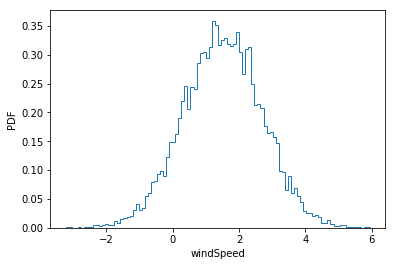

In [75]:
# 1) vérifions la normalité des données du vent

import numpy as np

# get the parameters
mean=np.mean(df_merged['windSpeed'])
std=np.std(df_merged['windSpeed'])

# estimation de la distribution normale avec les paramètres
samples=np.random.normal(mean, std, size=10000)

# représentons  la function de la probabilité de distribution theorique (allure typique d'une distribution normale)

#bins c'est la racine carrée de size

#plot the PDF
import matplotlib.pyplot as plt
_ = plt.hist(samples,
             bins=100, density=True, histtype='step')
_ = plt.xlabel('windSpeed')
_ = plt.ylabel('PDF')
plt.show()

In [76]:
# 2) vérifions que la distribution normale est semblable à la distribution observée

# Définissons une fonction de la distribution cumulée empirique 

def ecdf(data):
    """fontion de la distribution cumulée """
    # x-data pour la fonction: x
    x=np.sort(data)
   
    # y-data pour la fonction: y
    y=np.arange(1, (len(x) + 1)) / len(x)

    return x, y

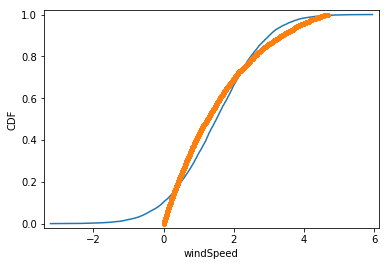

In [77]:
# 3) Créons cette fonction avec les données réelles: x, y
x_reel, y_reel = ecdf(df_merged['windSpeed'])

# 4) Créons la fonction de la distribution cumulée empirique à partir des échantillons théoriques : x_theor, y_theor
x_theor, y_theor = ecdf(samples)

# 5) mettons en évidence la fonction de la distribution cumulée empirique des données réelles x et y comme des points)
import matplotlib.pyplot as plt
_ =plt.plot(x_theor, y_theor)
_ =plt.plot(x_reel, y_reel, marker='.', linestyle='none')


# 6) labelisons les axes
_ =plt.xlabel('windSpeed')
_ =plt.ylabel('CDF')
plt.margins(0.02)

# 7) montrons le graphique
plt.show()

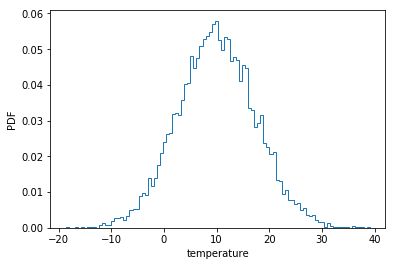

In [78]:
# vérifions la normalité des données des temperatures

import numpy as np

# get the parameters
mean=np.mean(df_merged['temperature'])
std=np.std(df_merged['temperature'])

# estimation de la distribution normale avec les paramètres
samples=np.random.normal(mean, std, size=10000)

# représentons  la function de la probabilité de distribution theorique (allure typique d'une distribution normale)

#bins c'est la racine carrée de size

#plot the PDF
import matplotlib.pyplot as plt
_ = plt.hist(samples,
             bins=100, density=True, histtype='step')
_ = plt.xlabel('temperature')
_ = plt.ylabel('PDF')
plt.show()

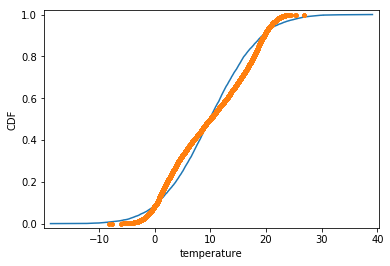

In [79]:
# observons les fonctions des distributions cumulées pour la température
# Créons cette fonction avec les données réelles: x, y
x_reel, y_reel = ecdf(df_merged['temperature'])

# Créons la fonction de la distribution cumulée empirique à partir des échantillons théoriques : x_theor, y_theor
x_theor, y_theor = ecdf(samples)

# mettons en évidence la fonction de la distribution cumulée empirique des données réelles x et y comme des points)
import matplotlib.pyplot as plt
_ =plt.plot(x_theor, y_theor)
_ =plt.plot(x_reel, y_reel, marker='.', linestyle='none')


# labelisons les axes
_ =plt.xlabel('temperature')
_ =plt.ylabel('CDF')
plt.margins(0.02)

# montrons le graphique
plt.show()

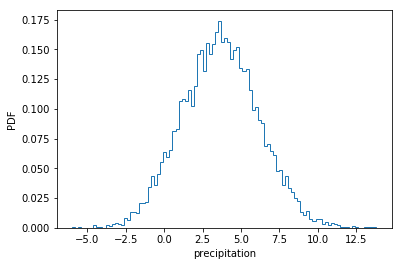

In [80]:
# vérifions la normalité des données des précipitations

import numpy as np

# get the parameters
mean=np.mean(df_merged['precipitation'])
std=np.std(df_merged['precipitation'])

# estimation de la distribution normale avec les paramètres
samples=np.random.normal(mean, std, size=10000)

# représentons  la function de la probabilité de distribution theorique (allure typique d'une distribution normale)

#bins c'est la racine carrée de size

#plot the PDF
import matplotlib.pyplot as plt
_ = plt.hist(samples,
             bins=100, density=True, histtype='step')
_ = plt.xlabel('precipitation')
_ = plt.ylabel('PDF')
plt.show()

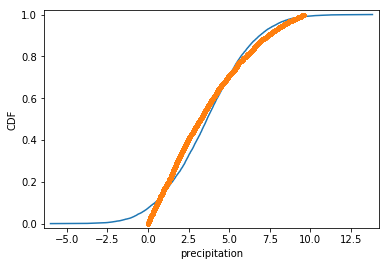

In [81]:
# observons les fonctions des distributions cumulées pour les précipitations
# Créons cette fonction avec les données réelles: x, y
x_reel, y_reel = ecdf(df_merged['precipitation'])

# Créons la fonction de la distribution cumulée empirique à partir des échantillons théoriques : x_theor, y_theor
x_theor, y_theor = ecdf(samples)

# mettons en évidence la fonction de la distribution cumulée empirique des données réelles x et y comme des points)
import matplotlib.pyplot as plt
_ =plt.plot(x_theor, y_theor)
_ =plt.plot(x_reel, y_reel, marker='.', linestyle='none')


# labelisons les axes
_ =plt.xlabel('precipitation')
_ =plt.ylabel('CDF')
plt.margins(0.02)

# montrons le graphique
plt.show()

In [82]:
""" graphiquement, aucune donnée ne semble normalement distribuée à l'exception peut être des températures """

" graphiquement, aucune donnée ne semble normalement distribuée à l'exception peut être des températures "

In [83]:
# on peut le vérifier en checkant si les moyennes et les medianes sont bien égales

In [84]:
np.median(df_merged['precipitation'])

3.2400889999999998

In [85]:
np.mean(df_merged['precipitation'])

3.633229414253891

In [86]:
""" on voit bien que les données précipitations ne sont pas égales en ce qui concerne la médiane et la moyenne """

' on voit bien que les données précipitations ne sont pas égales en ce qui concerne la médiane et la moyenne '

In [87]:
np.mean(df_merged['windSpeed'])

1.52184149199808

In [88]:
np.median(df_merged['windSpeed'])

1.2478458000000001

In [89]:
""" le même constat est valable pour la vitesse du vent """

' le même constat est valable pour la vitesse du vent '

In [90]:
np.mean(df_merged['temperature'])

9.98622606529491

In [91]:
np.median(df_merged['temperature'])

9.981366

In [92]:
""" effectivement les températures semblent normalement distribuées """

' effectivement les températures semblent normalement distribuées '

# Essayons de prédire le nombre de passagers

##### enlevons les colonnes pour lesquelles, intuitivement nous pensons qu'elles n'ont aucune influence: à savoir le id
##### mais aussi les colonnes qui sont correllées aux autres 
##### (la date est liée à la température, précipitation, vent puisqu'on parle de la même ville)

In [93]:
df_merged_clean =df_merged.drop(['id','date'], axis=1)

In [94]:
df_merged_clean

,temperature,windSpeed,precipitation,number_passengers,duration
0,0.185703,3.152788,4.090158,38.0,2.008839
1,0.185703,3.152788,4.090158,34.0,1.935641
2,2.093932,0.982883,1.429355,37.0,2.051586
3,2.093932,0.982883,1.429355,39.0,2.017713
4,2.093932,0.982883,1.429355,38.0,1.968442
5,2.093932,0.982883,1.429355,66.0,1.020850
6,0.242077,2.429390,4.202771,34.0,2.056277
7,0.242077,2.429390,4.202771,67.0,1.056029
8,0.242077,2.429390,4.202771,75.0,1.044218
9,0.242077,2.429390,4.202771,82.0,1.166688


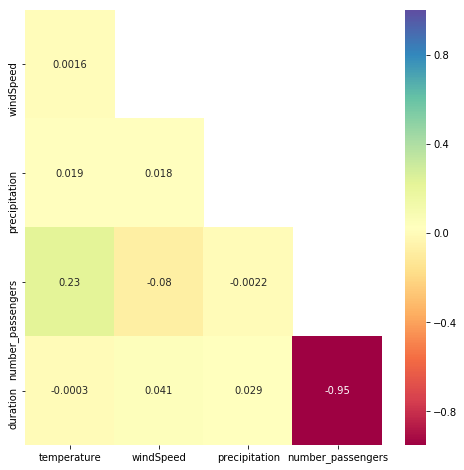

In [95]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = df_merged_clean.corr()

# pour avoir une bonne taille
fig, ax = plt.subplots(figsize=(8, 8))

# mask
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# ajuster le mask et les données pour qu'ils correspondent
mask = mask[1:, :-1]

correlation = corr.iloc[1:,:-1].copy()

sns.heatmap(correlation, mask=mask, cmap="Spectral", annot=True)


In [96]:
""" Au vu de ce heatmap, il semblerait que le nombre de passagers soit clairement négativement correlé à la durée """

' Au vu de ce heatmap, il semblerait que le nombre de passagers soit clairement négativement correlé à la durée '

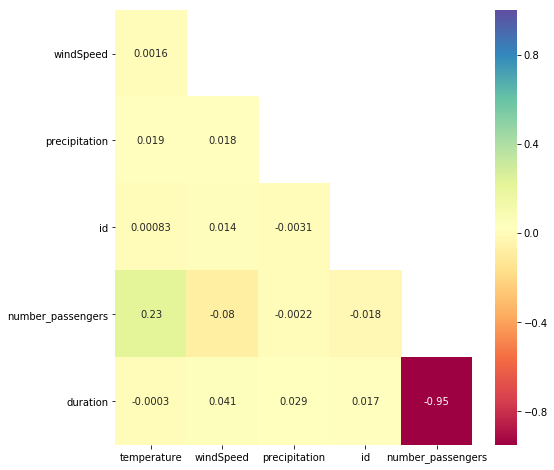

In [97]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = df_merged.corr()

# pour avoir une bonne taille
fig, ax = plt.subplots(figsize=(8, 8))

# mask
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# ajuster le mask et les données pour qu'ils correspondent
mask = mask[1:, :-1]

correlation = corr.iloc[1:,:-1].copy()

sns.heatmap(correlation, mask=mask, cmap="Spectral", annot=True)

In [98]:
# déterminons la pente et l'ordonée à l'origine sur des données non normées
slope, intercept=np.polyfit(df_merged['number_passengers'],
                            df_merged['duration'], 1)

In [99]:
# la pente
slope

-0.022314664431925278

In [100]:
# l'ordonnée à l'origine
intercept

2.915019229750406

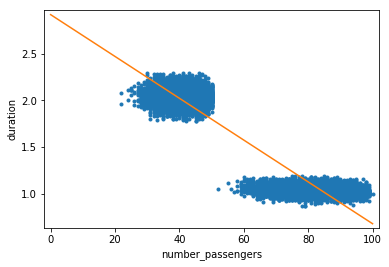

In [101]:
# réprésentons une droite de régression théorique
x = np.array([0, 100])
y = slope * x + intercept


# reprséntons le nombre de passagers vs la durée
_ = plt.plot(df_merged['number_passengers'],
             df_merged['duration'], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('number_passengers')
_ = plt.ylabel('duration')

# ajoutons une droite de regression
import matplotlib.pyplot as plt
_ = plt.plot(x, y)

In [102]:
""" clairement on voit comme l'avait précédemment mentionné la carte de chaleur que le nombre de passagers décroît avec l'augmentation de la durée de voyage"""

" clairement on voit comme l'avait précédemment mentionné la carte de chaleur que le nombre de passagers décroît avec l'augmentation de la durée de voyage"

In [103]:
""" dit autrement il existe une relation linéaire entre ces deux variables de sorte qu'à mesure que la durée décroît le nombre de passagers augmente """

" dit autrement il existe une relation linéaire entre ces deux variables de sorte qu'à mesure que la durée décroît le nombre de passagers augmente "

In [104]:
# normons nos données puisqu'on sait qu'elles ne suivent pas une loi de distribution normale

In [105]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_merged_clean_scaled = pd.DataFrame(scaler.fit_transform(df_merged_clean), columns=df_merged_clean.columns)

df_merged_clean_scaled

,temperature,windSpeed,precipitation,number_passengers,duration
0,0.240325,0.672578,0.424155,0.205128,0.798977
1,0.240325,0.672578,0.424155,0.153846,0.747579
2,0.294653,0.209659,0.148126,0.192308,0.828992
3,0.294653,0.209659,0.148126,0.217949,0.805207
4,0.294653,0.209659,0.148126,0.205128,0.770611
5,0.294653,0.209659,0.148126,0.564103,0.105242
6,0.241930,0.518251,0.435838,0.153846,0.832286
7,0.241930,0.518251,0.435838,0.576923,0.129944
8,0.241930,0.518251,0.435838,0.679487,0.121651
9,0.241930,0.518251,0.435838,0.769231,0.207645


In [106]:
# je vais splitter les données entrainer le model et le valider
from sklearn.model_selection import train_test_split
train, test= train_test_split(df_merged_clean_scaled, test_size = 0.3)

# je sépare les variables expliquée et explicative
cible=['number_passengers']
var_inut=['temperature','precipitation', 'windSpeed']
var_explicative=[col for col in df_merged_clean_scaled.columns if col not in cible + var_inut]

# je construit les jeu de données pour entrainer et valider le modèle

X_train = train[var_explicative]
y_train = train[cible]
X_test = test[var_explicative]
y_test = test[cible]

# importons les autres librairies nécessaires'
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

# Instations le modèle
model = linear_model.LinearRegression()

# ajustons the model
model.fit(X_train, y_train)

# prédisons avec le model
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

# évaluons le jeu de données d'entrainement du modèle
r2_train = r2_score(y_train, y_train_pred)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_pred)))

# évaluons le jeu de données de validation du modèle

r2_test = r2_score(y_test, y_test_pred)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_pred)))

In [107]:
print('le score R2 pour le modèle d entrainement est {}'.format(r2_train))
print('le score R2 pour le modèle de validation est {}'.format(r2_test))
print('le rmse pour le modèle d entrainement est {}'.format(rmse_train))
print('le rmse pour le modèle de validation est {}'.format(rmse_test))

le score R2 pour le modèle d entrainement est 0.9070438374530896
le score R2 pour le modèle de validation est 0.9079514100282817
le rmse pour le modèle d entrainement est 0.08382233499579625
le rmse pour le modèle de validation est 0.0834413627439281


In [108]:
""" on voit bien que le modèle explique bien ce qu'il mesure puisque les scores ne bougent pas beaucoup d'un modèle à l'autre"""

" on voit bien que le modèle explique bien ce qu'il mesure puisque les scores ne bougent pas beaucoup d'un modèle à l'autre"

In [109]:
# déterminons la pente et l'ordonée à l'origine sur les données normmées
slope, intercept=np.polyfit(df_merged_clean_scaled['number_passengers'],
                            df_merged_clean_scaled['duration'], 1)

In [110]:
# la pente
slope

-1.2221537476976505

In [111]:
# l'ordonnée à l'origine
intercept

1.0905570389811723

In [112]:
# organisons notre dataset pour prédire

In [113]:
# les valeurs nulles
valeur_nulle = df_flights.isnull()

# les lignes avec valeurs nulles
ligne_nulle = valeur_nulle.any(axis=1)

# le dataframe avec au moins une ligne avec valeur nulle
df_flights_null = df_flights[ligne_nulle]

print(df_flights_null)

            id       date  number_passengers   duration
2            2 1995-01-01                NaN   2.025223
3            3 1995-01-01                NaN   2.066374
4            4 1995-01-01                NaN   1.048679
5            5 1995-01-01                NaN   1.029462
8            8 1995-02-01                NaN   1.985811
11          11 1995-02-01                NaN   0.996630
13          13 1995-03-01                NaN   2.044007
15          15 1995-03-01                NaN   1.070806
20          20 1995-04-01                NaN   1.046160
21          21 1995-04-01                NaN   1.081697
25          25 1995-05-01                NaN   2.029681
26          26 1995-05-01                NaN   1.048971
28          28 1995-05-01                NaN   0.995303
29          29 1995-05-01                NaN   0.993189
30          30 1995-06-01                NaN   2.134501
33          33 1995-06-01                NaN   1.026102
35          35 1995-06-01                NaN   1

In [114]:
# restons avec la colonne durée seulement qui nous interesse

In [115]:
df_flights_duration = df_flights_null['duration']
df_flights_duration

2          2.025223
3          2.066374
4          1.048679
5          1.029462
8          1.985811
11         0.996630
13         2.044007
15         1.070806
20         1.046160
21         1.081697
25         2.029681
26         1.048971
28         0.995303
29         0.993189
30         2.134501
33         1.026102
35         1.077234
37         2.040884
38         1.051448
41         1.024705
45         2.018766
47         1.119240
50         2.168718
52         1.049316
56         1.039917
60         2.097325
62        -1.014545
63         1.061216
65         1.082310
66         2.172554
            ...    
112045    -1.016119
112050    20.058437
112052     1.085038
112059    40.300297
112060     1.992049
112062     2.074366
112064     2.054906
112068     1.083738
112069     1.008969
112070     1.061521
112071     1.024015
112076     1.021045
112079     1.070003
112080     1.928726
112081     2.095858
112082     2.031471
112083     2.010961
112084     2.114041
112085     1.871080


In [116]:
# transformons notre jeu de données en dataframe
df_flights_durations = pd.DataFrame(df_flights_duration)

In [117]:
# normalisons notre jeu de données
flights_durations_non_df=scaler.fit_transform(df_flights_durations)

# mettons le en dataframe
df_flights_durations=pd.DataFrame(df_flights_durations, columns=df_flights_durations.columns)
df_flights_durations

,duration
2,2.025223
3,2.066374
4,1.048679
5,1.029462
8,1.985811
11,0.996630
13,2.044007
15,1.070806
20,1.046160
21,1.081697


In [118]:
df_flights_durations.shape

(55888, 1)

In [119]:
# predisons le nombre de passagers avec cette durée

In [120]:
predictions = model.predict(df_flights_durations)

In [121]:
predictions

array([[-0.64609633],
       [-0.67665457],
       [ 0.07907936],
       ...,
       [ 0.11655608],
       [ 0.1009924 ],
       [ 0.08186996]])

In [122]:
# transformons nos predictions en dataframe
df_predictions = pd.DataFrame(predictions)
df_predictions

,0
0,-0.646096
1,-0.676655
2,0.079079
3,0.093349
4,-0.616829
5,0.117730
6,-0.660045
7,0.062648
8,0.080950
9,0.054560


In [123]:
# dénormalisons les données

In [124]:
predictions_dénormalisées = scaler.inverse_transform(flights_durations_non_df)
predictions_dénormalisées

array([[2.0252233 ],
       [2.066374  ],
       [1.0486785 ],
       ...,
       [0.99821115],
       [1.0191697 ],
       [1.0449206 ]])

In [125]:
# prédictions en dataframe
df_predictions = pd.DataFrame(predictions_dénormalisées)
df_predictions_well_labeled = df_predictions.set_axis(["number_passengers"], axis="columns", inplace=False)

In [126]:
# arrondissons
df_predictions_rounded=df_predictions_well_labeled.apply(np.round)
df_predictions_rounded

,number_passengers
0,2.0
1,2.0
2,1.0
3,1.0
4,2.0
5,1.0
6,2.0
7,1.0
8,1.0
9,1.0


In [128]:
# exporter en csv
df_flights_prediction = df_predictions_rounded.to_csv ('C:\\Users\Asus\\Desktop\\flights.csv', index = None, header=True)
